# Zillow Clustering Project Explore Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
from env import host, user, password
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

import acquire
import prepare
import explore
import warnings
warnings.filterwarnings('ignore')

In [2]:
# connect to database, perform SQL query, write to csv, and convert to pandas DataFrame
df = acquire.get_zillow_cluster()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52438 entries, 0 to 52437
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   storytypeid                   47 non-null     float64
 2   propertylandusetypeid         52438 non-null  float64
 3   heatingorsystemtypeid         33934 non-null  float64
 4   buildingclasstypeid           0 non-null      float64
 5   architecturalstyletypeid      70 non-null     float64
 6   airconditioningtypeid         13638 non-null  float64
 7   parcelid                      52438 non-null  int64  
 8   id                            52438 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   52438 non-null  float64
 11  bedroomcnt                    52438 non-null  float64
 12  buildingqualitytypeid         33739 non-null  float64
 13  c

In [4]:
df = prepare.zillow_prep(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52359 entries, 14297519 to 12826780
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   52359 non-null  float64
 1   bedroomcnt                    52359 non-null  float64
 2   calculatedbathnbr             52297 non-null  float64
 3   calculatedfinishedsquarefeet  52351 non-null  float64
 4   fips                          52359 non-null  float64
 5   fullbathcnt                   52297 non-null  float64
 6   latitude                      52359 non-null  float64
 7   longitude                     52359 non-null  float64
 8   lotsizesquarefeet             51999 non-null  float64
 9   roomcnt                       52359 non-null  float64
 10  taxamount                     52355 non-null  float64
 11  logerror                      52359 non-null  float64
 12  LA                            52359 non-null  uint

In [6]:
# now let's split our clean data
train, \
validate, \
test, \
X_train, \
y_train,\
X_validate, \
y_validate, \
X_test, \
y_test = prepare.train_validate_test(df, 'logerror')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29320 entries, 13078281 to 11563281
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   29320 non-null  float64
 1   bedroomcnt                    29320 non-null  float64
 2   calculatedbathnbr             29281 non-null  float64
 3   calculatedfinishedsquarefeet  29314 non-null  float64
 4   fips                          29320 non-null  float64
 5   fullbathcnt                   29281 non-null  float64
 6   latitude                      29320 non-null  float64
 7   longitude                     29320 non-null  float64
 8   lotsizesquarefeet             29115 non-null  float64
 9   roomcnt                       29320 non-null  float64
 10  taxamount                     29317 non-null  float64
 11  logerror                      29320 non-null  float64
 12  LA                            29320 non-null  uint

In [8]:
train.nunique()

bathroomcnt                        21
bedroomcnt                         12
calculatedbathnbr                  20
calculatedfinishedsquarefeet     4088
fips                                3
fullbathcnt                        12
latitude                        28672
longitude                       28771
lotsizesquarefeet               10777
roomcnt                            16
taxamount                       28826
logerror                        29237
LA                                  2
Orange                              2
Ventura                             2
age                               130
taxrate                         29251
acres                           10777
bath_bed_ratio                     60
abs_logerror                    29237
dtype: int64

In [9]:
# time to impute...

train = prepare.impute_zillow(train, 'most_frequent', ['calculatedbathnbr', 'fullbathcnt', 'age', 'taxrate', 'taxamount', 'acres'])
X_train = prepare.impute_zillow(train, 'most_frequent', ['calculatedbathnbr', 'fullbathcnt', 'age', 'taxrate', 'taxamount', 'acres'])
train = prepare.impute_zillow(train, 'median', ['calculatedfinishedsquarefeet',  'lotsizesquarefeet'])
X_train = prepare.impute_zillow(X_train, 'median', ['calculatedfinishedsquarefeet',  'lotsizesquarefeet'])

In [10]:
list(train)

['bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'taxamount',
 'logerror',
 'LA',
 'Orange',
 'Ventura',
 'age',
 'taxrate',
 'acres',
 'bath_bed_ratio',
 'abs_logerror']

In [11]:
variables = ['bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'taxamount',
 'age',
 'taxrate',
 'acres',
 'bath_bed_ratio',]

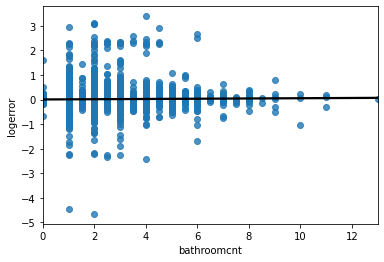

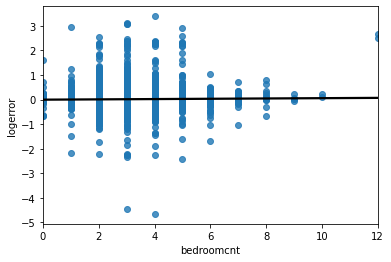

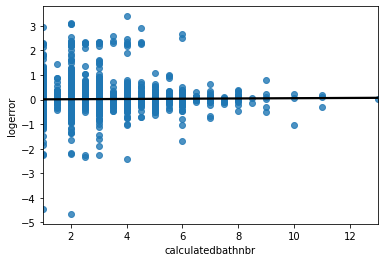

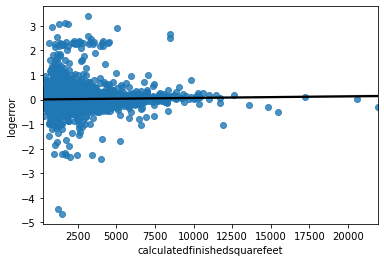

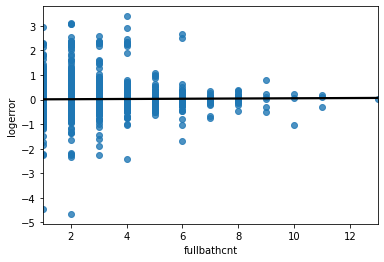

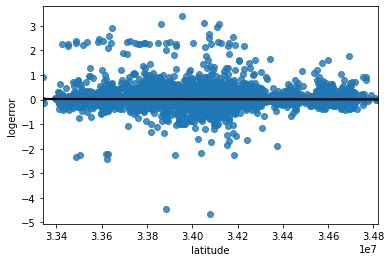

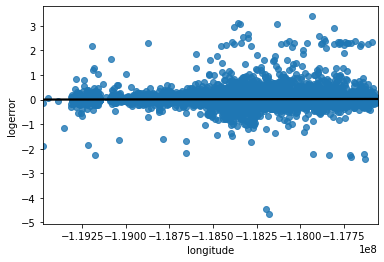

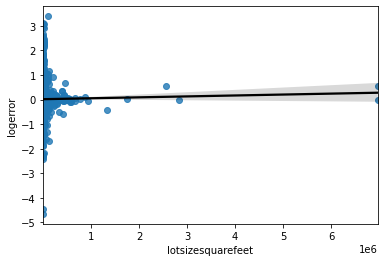

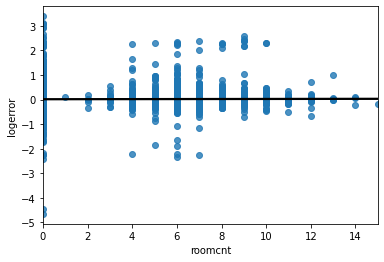

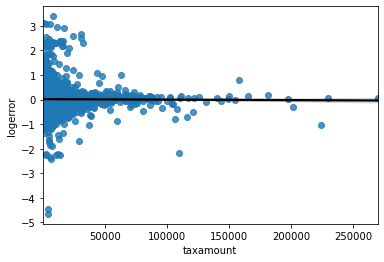

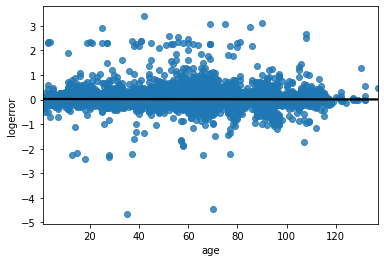

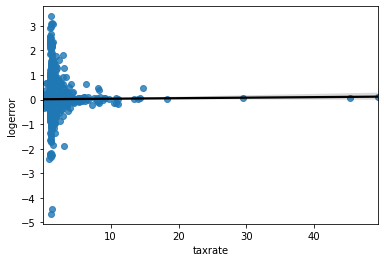

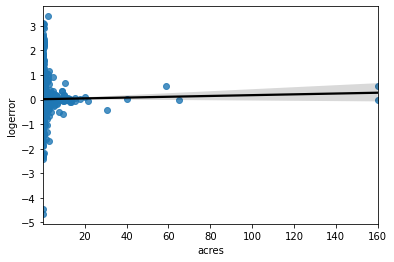

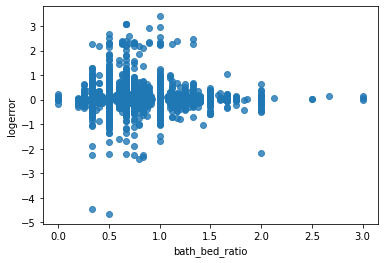

In [12]:
explore.plot_vars_target(train, 'logerror', variables)

### Takeaways:
- The widest range of logerror appears to be on lower-middle class properties
    - most variables have widest range of logerror at lower end of variable range
    - bed, bath, sqft, etc have greatest error at their respective lower ends
- I would like to be able to use latitude and longitude to create neighborhood variables
- Plenty of exploration still left to do, and no clear cut drivers of error at this point...

In [13]:
# What do I need to scale?
train.nunique()

bathroomcnt                        21
bedroomcnt                         12
calculatedbathnbr                  20
calculatedfinishedsquarefeet     4088
fips                                3
fullbathcnt                        12
latitude                        28672
longitude                       28771
lotsizesquarefeet               10777
roomcnt                            16
taxamount                       28826
logerror                        29237
LA                                  2
Orange                              2
Ventura                             2
age                               130
taxrate                         29251
acres                           10777
bath_bed_ratio                     60
abs_logerror                    29237
dtype: int64

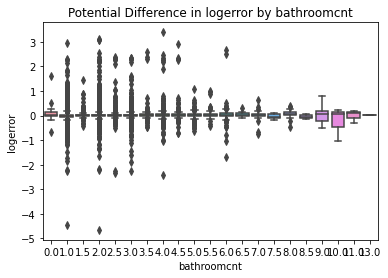

In [14]:
sns.boxplot(train.bathroomcnt, train.logerror)
plt.title('Potential Difference in logerror by bathroomcnt')
plt.show()

## Hypothosis Testing

### Hypothesis 1:
- ${H_O}$: There is no difference in mean logerror between bathroomcnt <=1, and mean logerror of all bathroom counts.
- ${H_a}$: There is a difference in mean logerror between bathroomcnt <=1, and mean logerror of all bathroom counts.
- alpha = 0.05

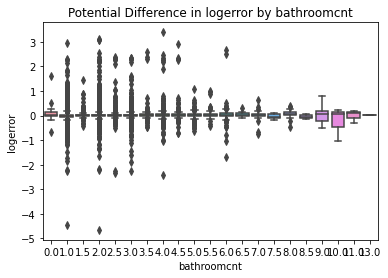

In [15]:
sns.boxplot(train.bathroomcnt, train.logerror)
plt.title('Potential Difference in logerror by bathroomcnt')
plt.show()

In [16]:
# How does variance compare among these groups?
stats.levene(train[train.bathroomcnt<=1].logerror, train[train.bathroomcnt>1].logerror)

LeveneResult(statistic=135.86740189823732, pvalue=2.5012910112305463e-31)

In [17]:
# Now to run a ttest to compare mean logerrors
stats.ttest_ind(train[train.bathroomcnt <= 1].logerror, train[train.bathroomcnt > 1].logerror, equal_var=False)

Ttest_indResult(statistic=-1.9903437612349113, pvalue=0.046591735155672005)

#### Hypothesis 1 Takeaways:
- Due to leven test, we see vairance is not equal among these groups
- Since my p-value is less than alpha, we can reject the null hypothesis
- Evidence to suggest bathroomcnt could be a good feature for modeling

### Hypothesis 2:
- ${H_O}$: There is no difference in mean logerror between bedroomcnt <=3, and mean logerror of bedroomcnt > 3.
- ${H_a}$: There is a difference in mean logerror between bedroomcnt <=3, and mean logerror of bedroomcnt > 3.
- alpha = 0.05

In [18]:
# How does variance compare among these groups?
stats.levene(train[train.bedroomcnt<=1].logerror, train[train.bedroomcnt>1].logerror)

LeveneResult(statistic=63.285201437002975, pvalue=1.852452553061133e-15)

In [19]:
# Now to run a ttest to compare mean logerrors
stats.ttest_ind(train[train.bedroomcnt <= 3].logerror, train[train.bedroomcnt > 3].logerror, equal_var=False)

Ttest_indResult(statistic=-3.8612263049828606, pvalue=0.00011312744440681724)

#### Hypothesis 2 Takeaways:
- Due to Levene test, we see vairance is not equal among these groups
- Since my p-value is less than alpha, we can reject the null hypothesis
- Evidence to suggest bedroomcnt could be a good feature for modeling

### Hypothesis 3:
- ${H_O}$: There is no relationship between latitude and logerror, (they are independent variables.)
- ${H_a}$: There is a relationship between latitude and logerror, (they are dependent variables.)
- alpha = 0.05

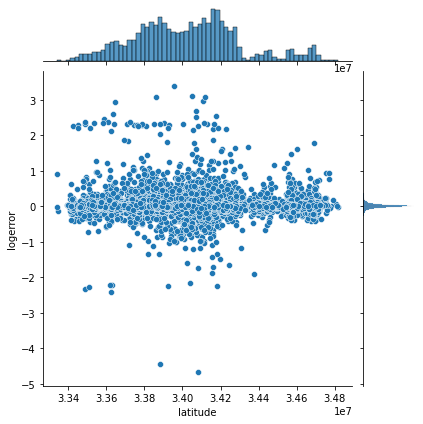

In [20]:
sns.jointplot(x='latitude', y='logerror', data=train)
plt.xlabel('Latitude')
plt.ylabel('Logerror')
plt.show()

In [21]:
r, p = stats.pearsonr(train.latitude, train.logerror)
r, p

(-0.017360015692119944, 0.002952242714942228)

#### Hypothesis 3 Takeaways:
- Since my p-value is less than alpha, we can reject the null hypothesis
- However, due to a very low correlation coefficient (r), there does not appear to be evidence to suggest linear relationship between latitude and logerror
- Evidence to suggest latitude could be a good feature for modeling, if used in conjunction with other features

### Hypothesis 4:
- ${H_O}$: There is no relationship between longitude and logerror, (they are independent variables.)
- ${H_a}$: There is a relationship between longitude and logerror, (they are dependent variables.)
- alpha = 0.05

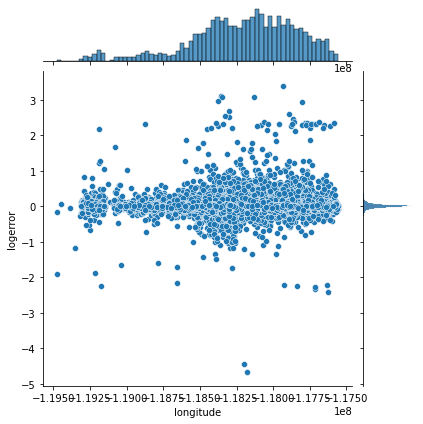

In [22]:
sns.jointplot(x='longitude', y='logerror', data=train)
plt.xlabel('Longitude')
plt.ylabel('Logerror')
plt.show()

In [23]:
r, p = stats.pearsonr(train.longitude, train.logerror)
r, p

(0.025713918158874794, 1.0649072854875926e-05)

#### Hypothesis 4 Takeaways:
- Since my p-value is less than alpha, we can reject the null hypothesis
- However, due to a very low correlation coefficient (r), there does not appear to be evidence to suggest linear relationship between longitude and logerror
- Evidence to suggest longitude could be a good feature for modeling, if used in conjunction with other features

### Clustering

#### cluster_alpha

In [24]:
X_train = train[['age', 'latitude', 'longitude']]

X_train_scaled, stan_scaler = explore.scale_my_data(X_train, StandardScaler())

In [25]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 1221)

# fit the thing
kmeans.fit(X_train_scaled)

# Use (predict using) the thing 
kmeans.predict(X_train_scaled)

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [26]:
# make a new column names cluster in iris and X_scaled dataframe
train['cluster_alpha'] = kmeans.predict(X_train_scaled)

X_train_scaled['cluster_alpha'] = kmeans.predict(X_train_scaled)

In [27]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X_train.columns)
centroids_scaled

,age,latitude,longitude
0,-0.663775,1.179396,-1.028069
1,0.843868,-0.036782,-0.049750
2,-0.594154,-0.953597,0.943635


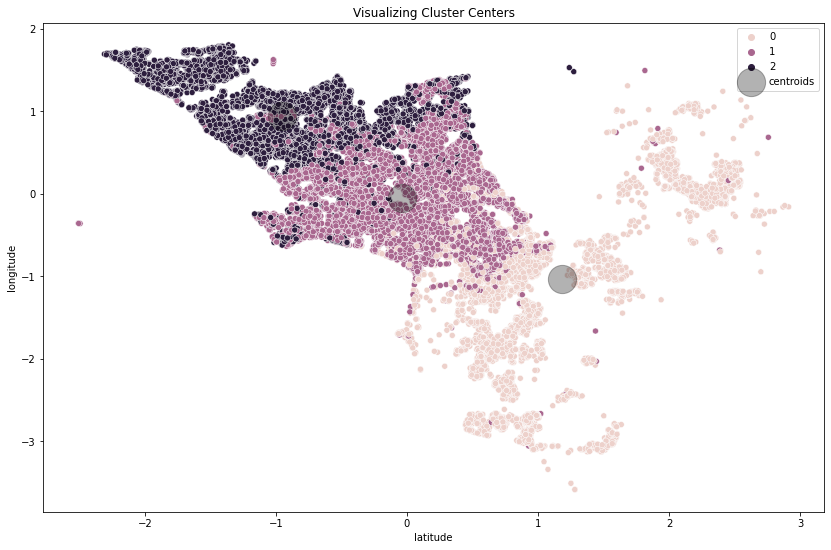

In [28]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'latitude', y = 'longitude', data = X_train_scaled, hue = 'cluster_alpha')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x= 'latitude', y = 'longitude', 
                              ax = plt.gca(), 
                              s = 800, color = 'k', 
                              alpha = 0.3, 
                              label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

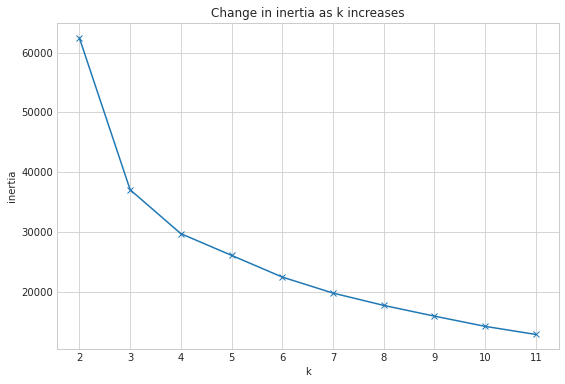

In [29]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

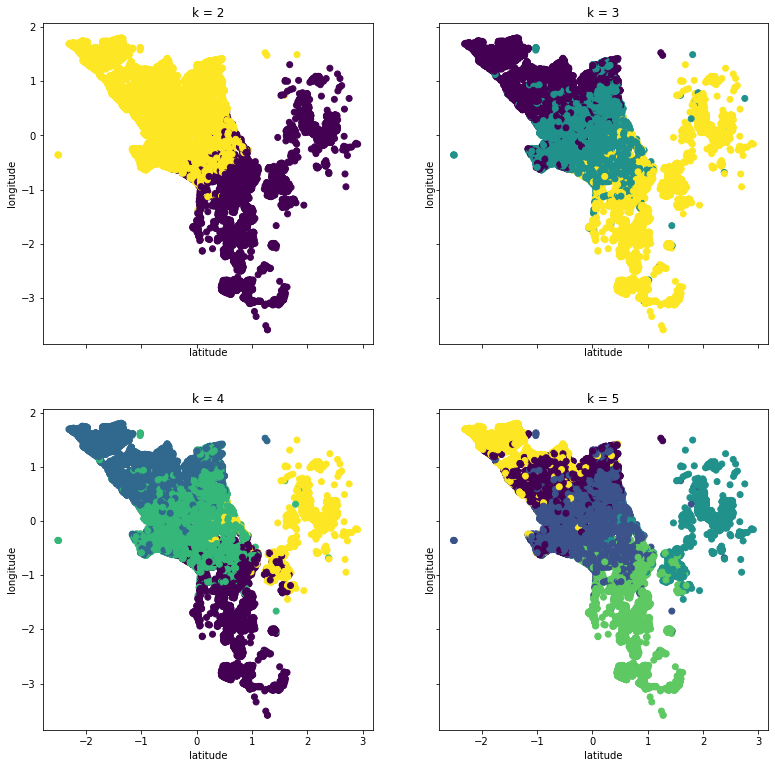

In [30]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_train_scaled).predict(X_train_scaled)
    ax.scatter(X_train_scaled.latitude, X_train_scaled.longitude, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='latitude', ylabel='longitude')

#### cluster_alpha takeways:
- 3 or 4 clusters appears to be the way to go...
- While intertia is lower on 4 clusters, 3 might provide less overfitting
- Both (3,4) are worth exploring further...

#### cluster_beta

In [31]:
X1_train = train[['calculatedfinishedsquarefeet', 'age']]

X1_train_scaled, stan_scaler = explore.scale_my_data(X1_train, StandardScaler())

In [32]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 1221)

# fit the thing
kmeans.fit(X1_train_scaled)

# Use (predict using) the thing 
kmeans.predict(X1_train_scaled)

array([2, 1, 2, ..., 0, 0, 0], dtype=int32)

In [33]:
# make a new column names cluster in iris and X_scaled dataframe
train['cluster_beta'] = kmeans.predict(X1_train_scaled)

X1_train_scaled['cluster_beta'] = kmeans.predict(X1_train_scaled)

In [34]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X1_train.columns)
centroids_scaled

,calculatedfinishedsquarefeet,age
0,-0.492431,0.725469
1,2.039165,-1.146582
2,0.089956,-0.719763


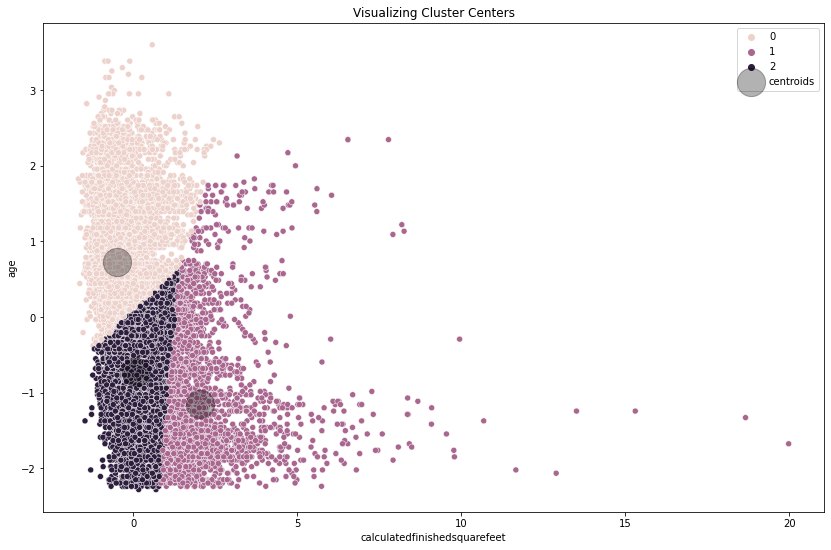

In [35]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y = 'age', data = X1_train_scaled, hue = 'cluster_beta')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x= 'calculatedfinishedsquarefeet', y = 'age', 
                              ax = plt.gca(), 
                              s = 800, color = 'k', 
                              alpha = 0.3, 
                              label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

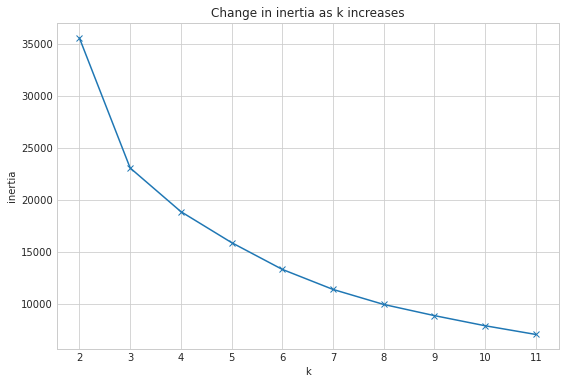

In [36]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X1_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

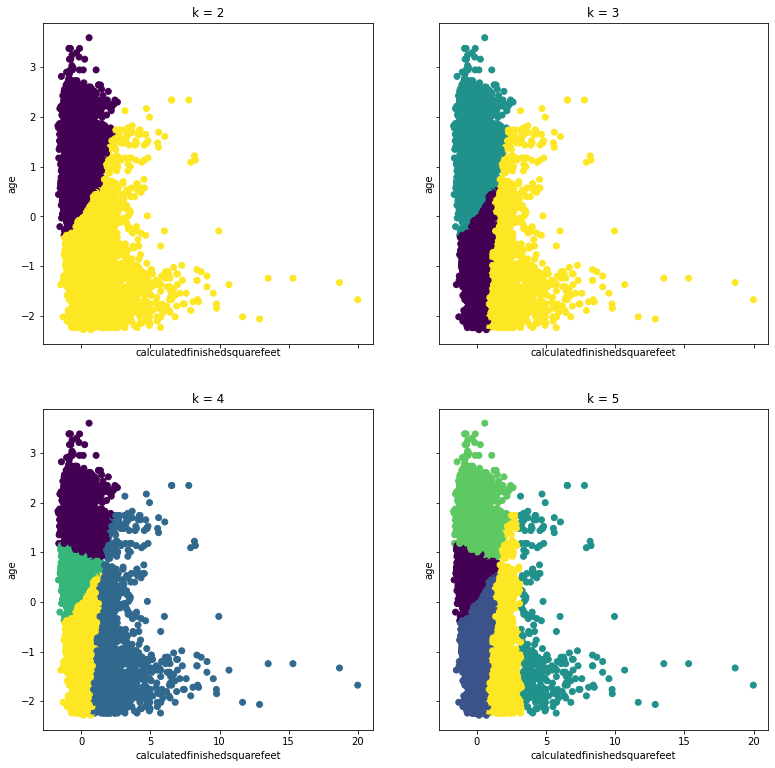

In [37]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X1_train_scaled).predict(X1_train_scaled)
    ax.scatter(X1_train_scaled.calculatedfinishedsquarefeet, X1_train_scaled.age, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='calculatedfinishedsquarefeet', ylabel='age')

#### cluster_beta takeways:
- 3 or 4 clusters appears to be the way to go...
- although 5 is interesting as well (might be overfit, might be great...)
- 3, 4, and 5 all worth exploring further on beta

#### cluster_charlie

In [38]:
X2_train = train[['bedroomcnt', 'bathroomcnt', 'taxrate']]

X2_train_scaled, stan_scaler = explore.scale_my_data(X2_train, StandardScaler())

In [40]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 1221)

# fit the thing
kmeans.fit(X2_train_scaled)

# Use (predict using) the thing 
kmeans.predict(X2_train_scaled)

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [41]:
# make a new column names cluster in iris and X_scaled dataframe
train['cluster_charlie'] = kmeans.predict(X2_train_scaled)

X2_train_scaled['cluster_charlie'] = kmeans.predict(X2_train_scaled)

In [42]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X2_train.columns)
centroids_scaled

,bedroomcnt,bathroomcnt,taxrate
0,0.820494,0.728210,-0.081811
1,-0.670018,-0.594654,0.054342
2,-0.674738,-0.625146,67.116063


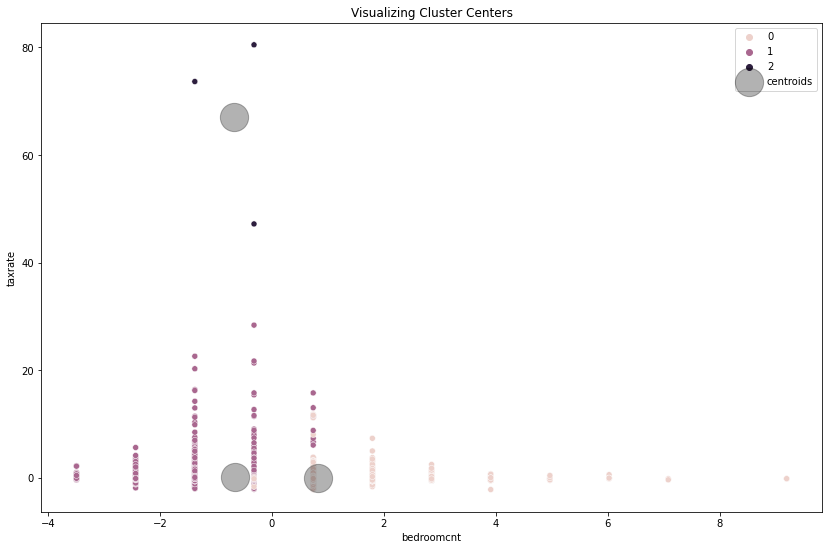

In [44]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'bedroomcnt', y = 'taxrate', data = X2_train_scaled, hue = 'cluster_charlie')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x= 'bedroomcnt', y = 'taxrate', 
                              ax = plt.gca(), 
                              s = 800, color = 'k', 
                              alpha = 0.3, 
                              label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();